In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import pandas_profiling as pp
import matplotlib as plt
%matplotlib inline

In [2]:
# Load datasets
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
data = train.append(test, ignore_index=True, sort=False)

# preview dataset and its shape
print(data.shape, train.shape, test.shape)
data.head()

(13868, 9) (11094, 9) (2774, 8)


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [3]:
# check for unique values in each column
data.nunique()

Restaurant       8661
Location           35
Cuisines         2392
Average_Cost       26
Minimum_Order      20
Rating             33
Votes            1181
Reviews           811
Delivery_Time       7
dtype: int64

In [4]:
# Preview dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     13868 non-null  object
 1   Location       13868 non-null  object
 2   Cuisines       13868 non-null  object
 3   Average_Cost   13868 non-null  object
 4   Minimum_Order  13868 non-null  object
 5   Rating         13868 non-null  object
 6   Votes          13868 non-null  object
 7   Reviews        13868 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 975.2+ KB


## Feature Engineering

Description of Feature Engineering for each feature:
1. Delivery_Time (Target Variable): Convert 'minutes' in each column to an empty string '' and lastly convert to integer.

2. Location (Feature): Create a new column indicating the City names of each Restaurant Location extracted from the address

3. Cuisines (Feature): Create categories to group related cuisines.

4. Other (Features): Determine the top three Locations with the highest Average cost, Minimum Order, Ratings, Votes, Reviews and vice versa.

### Delivery Time 

In [5]:
data.Delivery_Time.describe()

count          11094
unique             7
top       30 minutes
freq            7406
Name: Delivery_Time, dtype: object

In [6]:
# Convert ' minutes' in each column to empty string '' and also convert to integer
data['Delivery_Time'] = data['Delivery_Time'].str.replace(' minutes','')
data['Delivery_Time']=pd.to_numeric(data['Delivery_Time'])

Delivery Time Value Counts:
 30.0     7406
45.0     2665
65.0      923
120.0      62
20.0       20
80.0       14
10.0        4
Name: Delivery_Time, dtype: int64


[Text(0.5, 1.0, 'City Food Delivery Counts'),
 Text(0.5, 0, 'Delivery Time (Minutes)')]

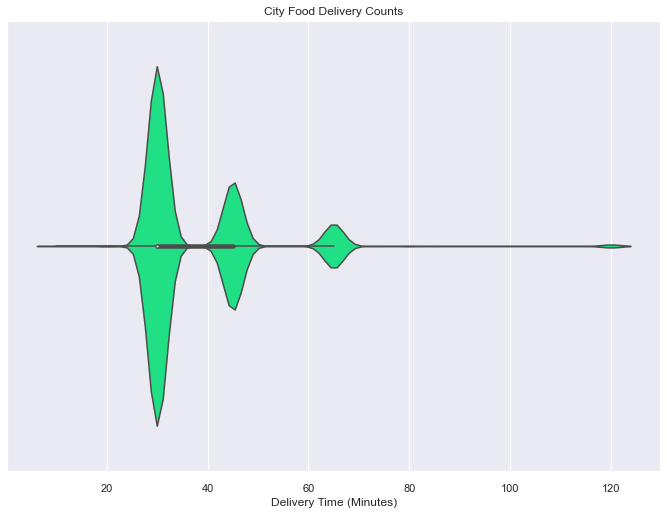

In [43]:
# preview  unique value counts of the Delivery Time periods
print('Delivery Time Value Counts:\n', data['Delivery_Time'].value_counts())

# set fig size
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# preview
d = sns.violinplot(x='Delivery_Time', data=data, palette='gist_rainbow_r')
d.set(title='City Food Delivery Counts', xlabel='Delivery Time (Minutes)')

### Location

Noida          2647
Pune           2063
Mumbai         1536
Delhi          1433
Bangalore      1158
Kolkata         678
Gurgoan         611
Timarpur        602
Whitefield      585
IndiaGate       504
Marathalli      444
Majestic        411
Maharashtra     379
Hyderabad       371
Gurgaon         323
Begumpet         93
Electronic       30
Name: City, dtype: int64


C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWi

[Text(0.5, 1.0, 'City Food Delivery Counts')]

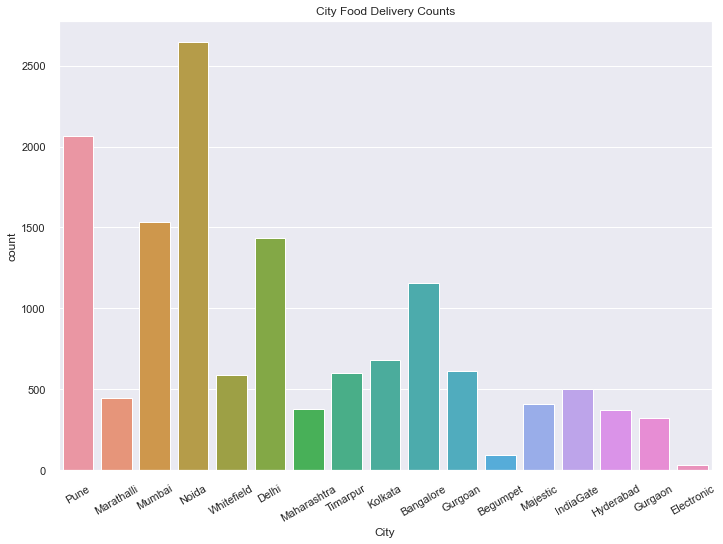

In [8]:
# Assing only second part of address containing City names to City and replace spaces to empty string
data['City'] = data.Location.str.rpartition(',')[2].str.replace(' ', '')

# Use only a single City text name for texts with other texts value
data['City'][data.City.str.contains('Pune')] = 'Pune'
data['City'][data.City.str.contains('Delhi')] = 'Delhi'
data['City'][data.City.str.contains('Mumbai')] = 'Mumbai'
data['City'][data.City.str.contains('Majestic')] = 'Majestic'
data['City'][data.City.str.contains('Electronic')] = 'Electronic'

# preview
print(data.City.value_counts())
c = sns.countplot(x='City', data=data)
c.set_xticklabels(c.get_xticklabels(), rotation=30)
c.set(title='City Food Delivery Counts')

### Cuisines

In [9]:
# adjust Cuisine texts to be easily reitereatable
data['Cuisines'] = data['Cuisines'].str.lower()
data['Cuisines'] = data['Cuisines'].str.replace(' ','')

In [10]:
# group Cuisines into categories
fastfood = '|'.join(['fastfood','rolls','burger','wraps','streetfood','momos','sandwich','fingerfood','barfood','rawmeats','hotdogs','cafe','pizza'])
data['Cuisines'] = data['Cuisines'].str.replace(fastfood,"Fast Food")

desserts = '|'.join(['icecream','mithai','bakery','bubbletea','mishti','paan','frozenyogurt','desserts'])
data['Cuisines'] = data['Cuisines'].str.replace(desserts,"Desserts")

european = '|'.join(['salad','continental','european','italian','german','spanish','steak','mediterranean','brazilian','belgian','french','portuguese','african','greek'])
data['Cuisines'] = data['Cuisines'].str.replace(european,"Continental")

american = '|'.join(['mexican','bbq','roastchicken','charcoalchicken','tex-mex','southamerican','poké','american',])
data['Cuisines'] = data['Cuisines'].str.replace(american,"American")

MiddleEastern = '|'.join(['arabian', 'kebab', 'lebanese', 'afghan', 'iranian', 'middleeastern', 'turkish', 'israeli'])
data['Cuisines'] = data['Cuisines'].str.replace(MiddleEastern,"Middle Eastern")

Regional = '|'.join(['southIndian', 'southNorth Indian','hyderabadi', 'lucknowi','mughlai','biryani', 'bengali','kerala', 'bihari', 'Lucknowi', 'mangalorean', 'bangali', 'andhra', 'assamese', 'maharashtrian', 'chettinad', 'parsi', 'odia', 'tamil', 'northeastern', 'bohri', 'goan', 'gujarati', 'rajasthani', 'naga', 'awadhi', 'kashmiri', 'malwani'])
data['Cuisines'] = data['Cuisines'].str.replace(Regional,"South Indian")

SeaFood = '|'.join(['thai', 'konkan', 'srilankan', 'poke','seafood'])
data['Cuisines'] = data['Cuisines'].str.replace(SeaFood,"Sea Food")

Asian = '|'.join(['asian', 'indonesian', 'japanese', 'burmese', 'sushi', 'cantonese', 'tibetan', 'malaysian', 'vietnamese', 'korean', 'bangladeshi', 'nepalese'])
data['Cuisines'] = data['Cuisines'].str.replace(Asian,"Asian")

Beverages = '|'.join(['tea', 'juices', 'coffee','beverages'])
data['Cuisines'] = data['Cuisines'].str.replace(Beverages,"Beverages")

Biryani = '|'.join(['chinese'])
data['Cuisines'] = data['Cuisines'].str.replace(Biryani,"Chinese")

NorthIndian = '|'.join(['indian', 'modernindian', 'modernnorthindian', 'northindian', 'northnorthindian'])
data['Cuisines'] = data['Cuisines'].str.replace(NorthIndian,"North Indian")

HealthyFood = '|'.join(['salad'])
data['Cuisines'] = data['Cuisines'].str.replace(HealthyFood,"Healthy Food")

In [12]:
# display Cuisine count in each category

Cuisines_list = data['Cuisines'].str.split(',')
Cuisines_counter = Counter(([a for b in Cuisines_list.tolist() for a in b]))
Cuisines_counter

Counter({'Fast Food': 7979,
         'Continental': 1910,
         'Desserts': 3405,
         'South Indian': 3050,
         'North Indian': 6028,
         'Chinese': 4339,
         'Beverages': 2127,
         'southNorth Indian': 1507,
         'Sea Food': 458,
         'Asian': 508,
         'American': 392,
         'healthyfood': 352,
         'Middle Eastern': 467})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

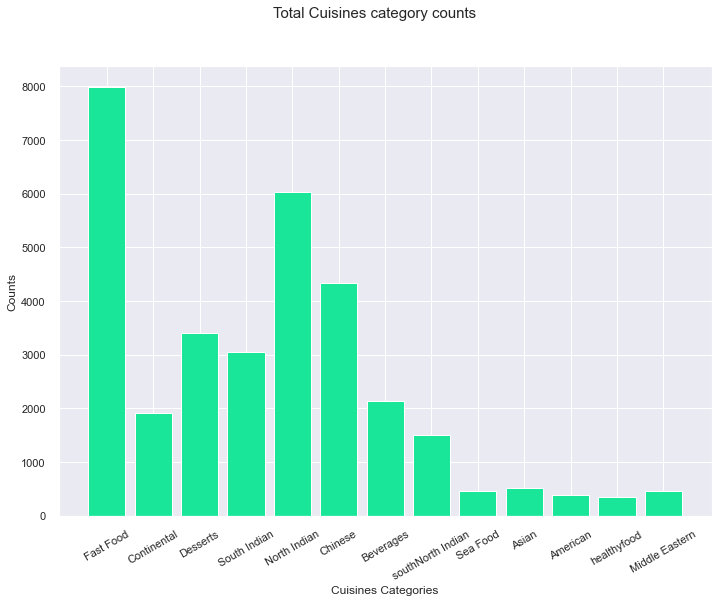

In [34]:
# Preview Histogram the Cuisine categories
plt.pyplot.bar(Cuisines_counter.keys(), Cuisines_counter.values(), color=(0.1, 0.9, 0.6))
plt.pyplot.suptitle('Total Cuisines category counts', fontsize=15)
plt.pyplot.xlabel("Cuisines Categories")
plt.pyplot.ylabel("Counts")
plt.pyplot.xticks(rotation=30)


### Location